<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/LectureNotebooks/FEDS_Lecture11_Homework_from_lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Homework

The aim of this homework is:

* read data from a csv file using pandas
* resample the data 
* make some graph

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [3]:
URL = 'https://raw.githubusercontent.com/stenoe/FEDS/main/data/dados_A807_H_2003-01-27_2023-03-06.csv'

In [5]:
urlretrieve(URL, 'dados_A807_H_2003-01-27_2023-03-06.csv')

('dados_A807_H_2003-01-27_2023-03-06.csv',
 <http.client.HTTPMessage at 0x7f7a285e5880>)

In [6]:
!head 'dados_A807_H_2003-01-27_2023-03-06.csv'

Nome: CURITIBA
Codigo Estacao: A807
Latitude: -25.4486111
Longitude: -49.23055554
Altitude: 922.91
Situacao: Operante
Data Inicial: 2003-01-27
Data Final: 2023-03-06
Periodicidade da Medicao: Horaria



In [7]:
inmet_CWB = pd.read_csv('dados_A807_H_2003-01-27_2023-03-06.csv',sep=';',skiprows=10)

In [8]:
inmet_CWB

,Data Medicao,Hora Medicao,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",Unnamed: 3
0,2003-01-27,0,NaN,NaN
1,2003-01-27,100,NaN,NaN
2,2003-01-27,200,NaN,NaN
3,2003-01-27,300,NaN,NaN
4,2003-01-27,400,NaN,NaN
...,...,...,...,...
176251,2023-03-06,1900,25.5,NaN
176252,2023-03-06,2000,26.0,NaN
176253,2023-03-06,2100,24.0,NaN
176254,2023-03-06,2200,22.2,NaN


In [9]:
date = inmet_CWB['Data Medicao'].values
hour = inmet_CWB['Hora Medicao'].values

In [10]:
date

array(['2003-01-27', '2003-01-27', '2003-01-27', ..., '2023-03-06',
       '2023-03-06', '2023-03-06'], dtype=object)

In [11]:
hour

array([   0,  100,  200, ..., 2100, 2200, 2300])

In [12]:
date_hour = []
for i in range(len(date)):
  date_hour.append(date[i] + ' ' +  str(int(hour[i]/100)) )

In [14]:
date_hour[0:2]

['2003-01-27 0', '2003-01-27 1']

In [19]:
list_ok = []
for i in range(len(date)):
  list_ok.append( datetime.strptime(date_hour[i], '%Y-%m-%d %H' ))

In [21]:
list_ok[0:3]

[datetime.datetime(2003, 1, 27, 0, 0),
 datetime.datetime(2003, 1, 27, 1, 0),
 datetime.datetime(2003, 1, 27, 2, 0)]

In [22]:
inmet_CWB['date'] = list_ok

In [24]:
inmet_CWB[0:2]

,Data Medicao,Hora Medicao,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",Unnamed: 3,date
0,2003-01-27,0,NaN,NaN,2003-01-27 00:00:00
1,2003-01-27,100,NaN,NaN,2003-01-27 01:00:00


In [25]:
del inmet_CWB['Data Medicao']
del inmet_CWB['Hora Medicao']

In [26]:
inmet_CWB[0:2]

,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",Unnamed: 3,date
0,NaN,NaN,2003-01-27 00:00:00
1,NaN,NaN,2003-01-27 01:00:00


In [28]:
inmet_CWB = inmet_CWB.set_index('date')
inmet_CWB[0:2]

,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",Unnamed: 3
date,,
2003-01-27 00:00:00,NaN,NaN
2003-01-27 01:00:00,NaN,NaN


In [29]:
del inmet_CWB['Unnamed: 3']

In [30]:
inmet_CWB[0:2]

,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)"
date,
2003-01-27 00:00:00,NaN
2003-01-27 01:00:00,NaN


In [31]:
inmet_CWB_daily_data = inmet_CWB.resample('d').mean()

In [32]:
inmet_CWB_daily_data

,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)"
date,
2003-01-27,NaN
2003-01-28,NaN
2003-01-29,NaN
2003-01-30,NaN
2003-01-31,NaN
...,...
2023-03-02,21.954167
2023-03-03,22.758333
2023-03-04,22.562500


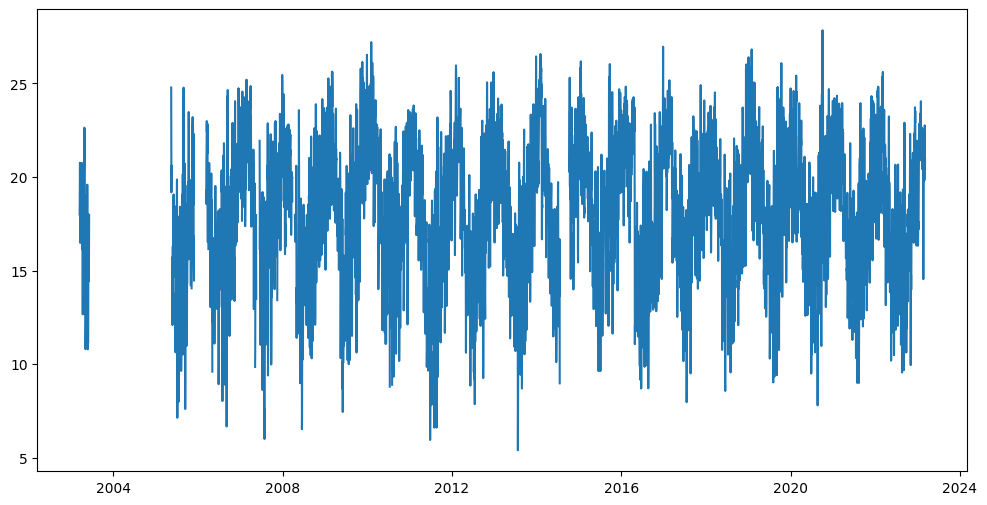

In [33]:
plt.figure(figsize = (12,6))
plt.plot(inmet_CWB_daily_data)

In [34]:
inmet_CWB_daily_data.isna().sum()

TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)    1020
dtype: int64

In [35]:
len(inmet_CWB_daily_data)

7344

In [36]:
inmet_CWB_daily_data['day'] = inmet_CWB_daily_data.index.dayofyear

In [38]:
inmet_CWB_daily_data[0:7]

,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",day
date,,
2003-01-27,NaN,27
2003-01-28,NaN,28
2003-01-29,NaN,29
2003-01-30,NaN,30
2003-01-31,NaN,31
2003-02-01,NaN,32
2003-02-02,NaN,33


In [39]:
df = inmet_CWB_daily_data.groupby(by='day').mean()

In [40]:
df

,"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)"
day,
1,21.655804
2,21.293233
3,21.117196
4,20.476291
5,20.651422
...,...
362,21.817545
363,21.633994
364,21.662010


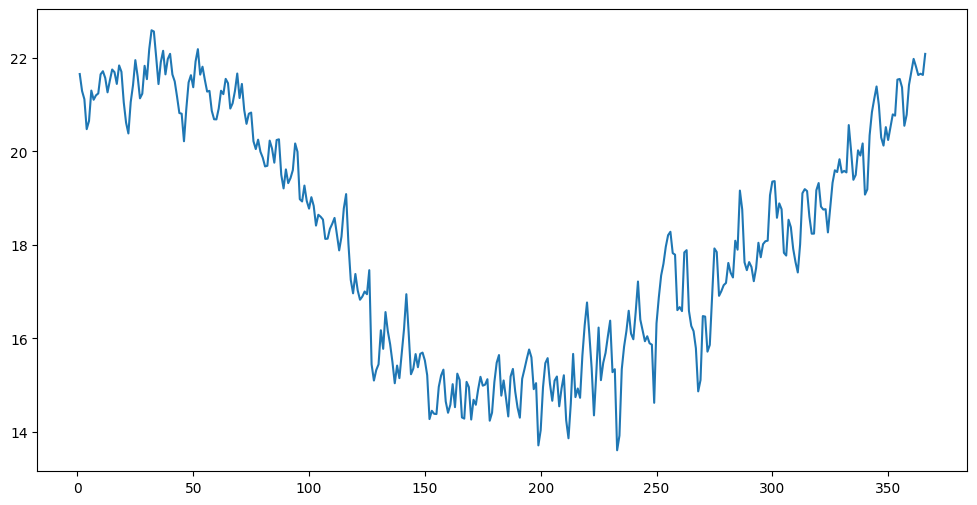

In [41]:
plt.figure(figsize = (12,6))
plt.plot(df)

In [45]:
URL1 = 'https://raw.githubusercontent.com/stenoe/FEDS/main/data/temp_tartu.csv'
urlretrieve(URL1, 'temp_tartu.csv')
tartu = pd.read_csv('temp_tartu.csv',sep=',')
tartu = tartu.set_index('dates')
tartu[0:3]

,T tartu mean (oC),T tartu min (oC),T tartu max (oC)
dates,,,
2004-01-01,-4.633333,-6.9,-2.8
2004-01-02,-8.333333,-9.9,-6.9
2004-01-03,-11.245833,-15.0,-8.0


In [48]:
list_ok2 = []
for i in range(len(tartu)):
  list_ok2.append( datetime.strptime(tartu.index[i], '%Y-%m-%d' ))

In [50]:
tartu['date_ok'] = list_ok2

In [51]:
tartu = tartu.set_index('date_ok')

In [52]:
tartu['day'] = tartu.index.dayofyear
df2 = tartu.groupby(by='day').mean()

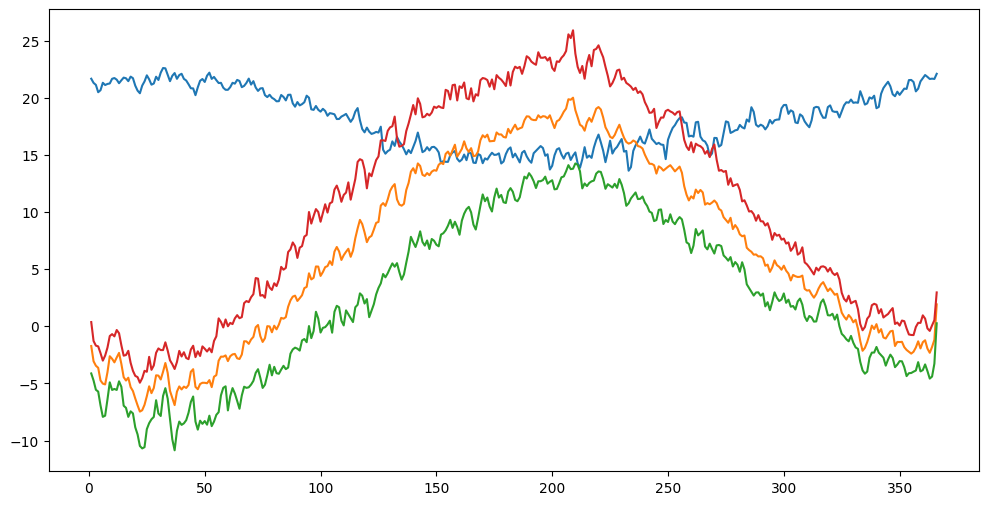

In [53]:
plt.figure(figsize = (12,6))
plt.plot(df)
plt.plot(df2)